In [2]:
import pandas as pd
import numpy as np
import warnings
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
# Ignore Warnings
warnings.filterwarnings("ignore")

In [6]:
url = "daily-min-temperatures.xls"
df =pd.read_csv(url, parse_dates=['Date'], index_col = 'Date')
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


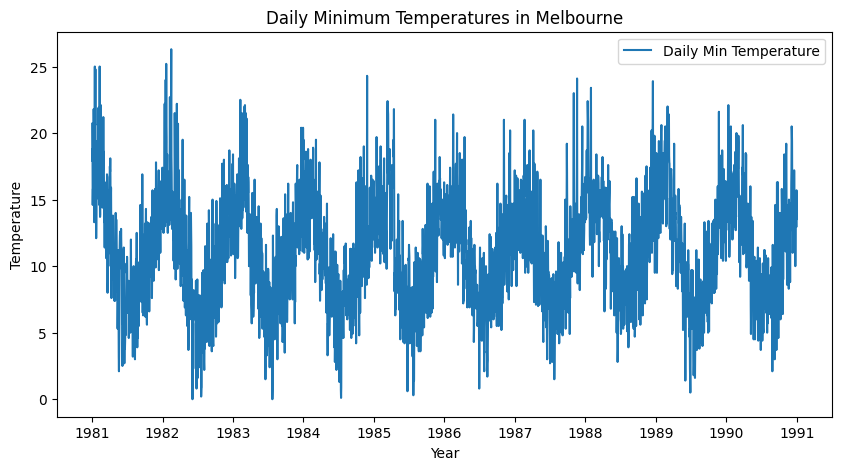

In [8]:
# Plot the dataset
plt.figure(figsize=(10,5))
plt.plot(df, label="Daily Min Temperature")
plt.title("Daily Minimum Temperatures in Melbourne")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [9]:
# Split data into training and test sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [10]:
# Define range of ARIMA parameters.
p_values = range(0, 4) # AR terms
d_values = range(0, 3)  # Differencing terms
q_values = range(0, 4) # MA terms

best_rmse, best_cfg = float("inf"), None

In [15]:
#Perform Grid Search
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(train, order=(p, d, q))
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test))
        rmse = sqrt(mean_squared_error(test, predictions))
        
        if rmse < best_rmse:
            best_rmse, best_cfg = rmse, (p, d, q)
        print(f"ARIMA {(p,d,q)} - RMSE: {rmse:.4f}")
    except:
        continue
# Print best model
print(f"\nBest ARIMA Model: {best_cfg} with RMSE: {best_rmse:.4f}")

ARIMA (0, 0, 0) - RMSE: 4.1196
ARIMA (0, 0, 1) - RMSE: 4.1190
ARIMA (0, 0, 2) - RMSE: 4.1170
ARIMA (0, 0, 3) - RMSE: 4.1169
ARIMA (0, 1, 0) - RMSE: 4.8765
ARIMA (0, 1, 1) - RMSE: 4.8007
ARIMA (0, 1, 2) - RMSE: 5.2312
ARIMA (0, 1, 3) - RMSE: 5.2767
ARIMA (0, 2, 0) - RMSE: 292.8544
ARIMA (0, 2, 1) - RMSE: 4.4909
ARIMA (0, 2, 2) - RMSE: 4.5038
ARIMA (0, 2, 3) - RMSE: 4.9861
ARIMA (1, 0, 0) - RMSE: 4.1074
ARIMA (1, 0, 1) - RMSE: 4.0995
ARIMA (1, 0, 2) - RMSE: 3.9874
ARIMA (1, 0, 3) - RMSE: 4.0218
ARIMA (1, 1, 0) - RMSE: 4.9366
ARIMA (1, 1, 1) - RMSE: 5.2695
ARIMA (1, 1, 2) - RMSE: 5.2753
ARIMA (1, 1, 3) - RMSE: 5.2770
ARIMA (1, 2, 0) - RMSE: 66.0650
ARIMA (1, 2, 1) - RMSE: 4.5602
ARIMA (1, 2, 2) - RMSE: 1835378.4580
ARIMA (1, 2, 3) - RMSE: 30.7187
ARIMA (2, 0, 0) - RMSE: 4.1051
ARIMA (2, 0, 1) - RMSE: 4.0406
ARIMA (2, 0, 2) - RMSE: 4.0284
ARIMA (2, 0, 3) - RMSE: 4.0244
ARIMA (2, 1, 0) - RMSE: 4.8225
ARIMA (2, 1, 1) - RMSE: 5.2765
ARIMA (2, 1, 2) - RMSE: 5.2764
ARIMA (2, 1, 3) - RMSE: 5.278